In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [2]:
# Load data
df = pd.read_csv("/content/bitcoin.csv")

# Drop 'Date' column
df.drop(['Date'], axis=1, inplace=True)

In [3]:
# Define prediction days and create prediction column
predictionDays = 30
df['Prediction'] = df[['Price']].shift(-predictionDays)

# Prepare independent (x) and dependent (y) datasets
x = np.array(df.drop(['Prediction'], axis=1))
x = x[:len(df) - predictionDays]  # Remove last 'n' rows

y = np.array(df['Prediction'])
y = y[:-predictionDays]  # Remove last 'n' rows

In [4]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Set up prediction days array
predictionDays_array = np.array(df.drop(['Prediction'], axis=1))[-predictionDays:]


In [5]:
# Create and train the model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(xtrain, ytrain)

# Evaluate the model
svr_rbf_confidence = svr_rbf.score(xtest, ytest)
print('SVR_RBF accuracy:', svr_rbf_confidence)

SVR_RBF accuracy: 0.22747616305798468


In [6]:
# Print predictions on test data and the actual test labels
svm_prediction = svr_rbf.predict(xtest)
print("Predicted:", svm_prediction)
print("Actual:", ytest)

# Print the model predictions for the next 30 days
future_prediction = svr_rbf.predict(predictionDays_array)
print("Future predictions for next 30 days:", future_prediction)


Predicted: [10274.58850133  8315.46546207  8128.38764481  8951.65807852
  8324.60065307  8255.72582546  8227.5821524   9399.1945816
  9236.74735048  8640.07925025  9397.31785843  8223.6100085
  8915.80842393  9028.36825596 10269.28255139  7845.54216199
  8463.55995382  8870.04341107  8137.53498925  8834.58985353
  8671.42370115  8216.03020387  9071.63954464  9052.17591869
  7898.82060976  9020.68651589  8601.9675632   9116.87451853
  9112.31991852  8601.95148999  9056.64825989  9315.1488828
  7886.80615559  8393.25359127 10071.90693455  9113.57742758
  8452.45914115  9064.30784686 10252.19363346  9379.51833159
  8410.35566937  9208.51948166  7980.79345916  9104.84005911
  9081.8410674   9224.72648544  7850.89231484 10180.45889997
  8598.67561153  7718.40179984  8419.2283543   9414.01231661
  8783.07517438  8263.74248165  8243.59144907  9050.74100887
  9036.62851798  7728.70226264  8448.87591927  8245.70065933
  7776.14801687  9120.50097556  8233.58829992  8423.0372287
  8848.13856597  

In [7]:
# Print the actual prices for the last 30 days
print("Actual last 30 days prices:")
print(df.tail(predictionDays))

Actual last 30 days prices:
           Price  Prediction
337  7550.900879         NaN
338  7569.936035         NaN
339  7679.867188         NaN
340  7795.601074         NaN
341  7807.058594         NaN
342  8801.038086         NaN
343  8658.553711         NaN
344  8864.766602         NaN
345  8988.596680         NaN
346  8897.468750         NaN
347  8912.654297         NaN
348  9003.070313         NaN
349  9268.761719         NaN
350  9951.518555         NaN
351  9842.666016         NaN
352  9593.896484         NaN
353  8756.430664         NaN
354  8601.795898         NaN
355  8804.477539         NaN
356  9269.987305         NaN
357  9733.721680         NaN
358  9328.197266         NaN
359  9377.013672         NaN
360  9670.739258         NaN
361  9726.575195         NaN
362  9729.038086         NaN
363  9522.981445         NaN
364  9081.761719         NaN
365  9182.577148         NaN
366  9180.045898         NaN


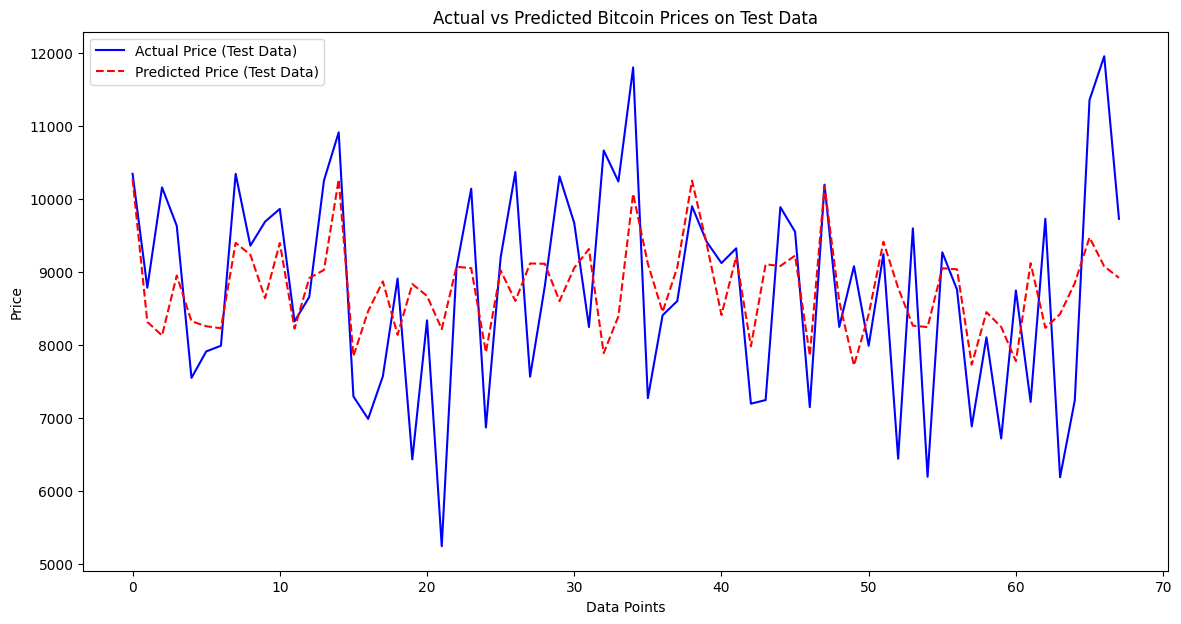

In [8]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices for the test data
plt.figure(figsize=(14, 7))

# Plot actual prices from the test set
plt.plot(range(len(ytest)), ytest, color='blue', label='Actual Price (Test Data)')

# Plot predicted prices from the test set
plt.plot(range(len(svm_prediction)), svm_prediction, color='red', linestyle='dashed', label='Predicted Price (Test Data)')

plt.title('Actual vs Predicted Bitcoin Prices on Test Data')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.show()



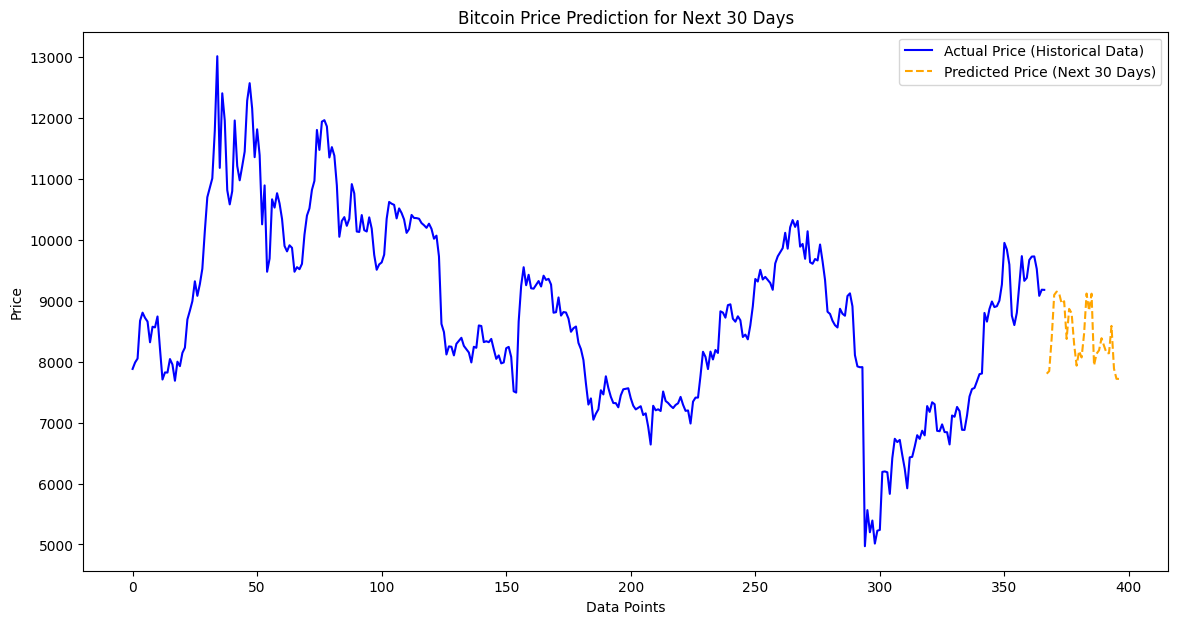

In [9]:
# Visualization of the entire dataset with future predictions
# Create a range for plotting actual and future predictions
total_data_range = list(range(len(df)))
future_data_range = list(range(len(df), len(df) + predictionDays))

# Plot the actual prices
plt.figure(figsize=(14, 7))
plt.plot(total_data_range, df['Price'], color='blue', label='Actual Price (Historical Data)')

# Plot the predictions for the next 30 days
plt.plot(future_data_range, future_prediction, color='orange', linestyle='dashed', label='Predicted Price (Next 30 Days)')

plt.title('Bitcoin Price Prediction for Next 30 Days')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.show()
